# 1. I have the story
Cứ 4 năm một lần, các nhà vô địch đều tụ họp lại đất nước **DS** để tham dự giải đấu *Pokemon Championships OCEANIA*

<img src="assets/combats/banner.jpg" />

Có rất nhiều trận đấu cặp pokemon với nhau, các Pokemon sẽ được sắp xếp dựa trên năng lực của Pokemon đó. 2 Pokemon mạnh nhất sẽ tranh chức vô địch giải đấu kì này.

<img src="assets/combats/tournament.jpg" />

Tuy nhiên, bên cạnh việc chỉ xem Pokemon đấu, các nhà cái sẽ tổ chức thêm cá độ Pokemon. Mỗi trận sẽ đều có cá độ, người thắng sẽ ăn gấp đôi, người cá thua sẽ mất trắng

Satoshi là một tay chơi cá độ Pokemon mới vào nghề, hắn ta muốn bắt đầu sự nghiệp cá cược của mình, nhưng hắn nhìn vào hệ số của 2 Pokemon đang ở trên bảng đấu kép và bắt đầu lo lắng. Nào là thanh máu (HP), tấn công vật lý (Attack), phòng thủ vật lý (Defense), hệ số tấn công và phòng thủ theo kỹ năng (Sp. Atk, Sp. Def) và tốc độ (Speed) của hai Pokemon đẹp đẽ kia. Hắn không hiểu!!!. Với cả hắn chưa cá cược lần nào, làm sao hắn có thể tự tin với quyết định may rủi lần này.

Hắn tự hỏi, làm thế nào mình có thể ăn gấp đôi ngay lần cá đầu tiên? *Đúng là **tham lam** mà*.

![satoshi_jerk](assets/combats/satoshi_jerk.png)

Sau bao nhiêu trận đấu được trôi qua, cũng đã đến trận đấu cuối cùng. Trận đấu cuối cùng là giữa *Tornadus Therian* vs *Greninja Ash*

<span>
    <img src="assets/combats/tornadus-therian.gif" width="200" />
    <img src="assets/combats/1vs1.jpg" width="250" />
    <img src="assets/combats/greninja-ash.gif" width="150" />
</span>

Satoshi nổi máu cờ bạc, muốn đặt hết hi vọng, đưa cả cái bóp cho bạn, nhờ bạn giúp đỡ việc đặt cược này, hắn bảo nếu ăn được, hắn sẽ nguyện làm trâu ngựa cho bạn, bằng không thì hắn sẽ ra cầu Long Biên mất.

Bài toán đặt ra là: nếu chỉ nhìn vào 2 Pokemon và chỉ số của chúng, liệu rằng có thể dự đoán được Pokemon nào thắng hay không.

Bạn được đưa ra yêu cầu giải quyết bài toán này, bằng **Data Science**

<h1 style="color: orange">Bạn có làm được không?</h1>

# 2. Thực hiện hóa

## 1. Import những thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

## 2. Load dữ liệu

In [2]:
df = pd.read_csv('pokemon.csv', index_col=0)
df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True


## 3. EDA (Đã thực hiện tuần vừa rồi)

![pikachu](assets/satoshi_pikachu.png)

## 4. Preprocessing dữ liệu

### 1. Ép kiểu dữ liệu cột `Legendary` từ `bool` --> `int`

Dữ liệu khi đưa vào mô hình cần là số thay vì các kiểu khác, nên ta ép kiểu.

In [3]:
df['Legendary'] = df['Legendary'].astype('int')

In [4]:
df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,1
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,1
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,1


In [5]:
df.dtypes

Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary      int32
dtype: object

### 2. One-Hot Encoding các hệ của Pokemon

Chúng ta có 18 hệ

In [6]:
pokemon_types = sorted(df['Type 1'].unique())
print(pokemon_types)

['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']


In [7]:
def one_hot_modify(row):
    global pokemon_types
    datum = {i: 0 for i in pokemon_types}
    datum[row['Type 1']] = 1
    if isinstance(row['Type 2'], str):
        datum[row['Type 2']] = 1
    return [i for i in datum.values()]

Sau khi áp dụng One-Hot Encoding thì ta sẽ có một ma trận 18 cột, chứa các số 1 tương ứng với có hệ đó và 0 tương ứng với không có hệ đó.

In [8]:
one_hot_types = df.T.apply(one_hot_modify).T
one_hot_types.columns = pokemon_types
one_hot_types

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
797,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
798,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


Nối bộ dữ liệu gốc với các hệ đã được encode, loại bỏ `Name` đi vì không cần thiết, loại bỏ `Type 1` và `Type 2` đi vì đã được chuyển hóa thành 18 cột nhị phân.

In [9]:
pokemon = pd.concat([df, one_hot_types], axis=1).drop(['Type 1', 'Type 2', 'Name'], axis=1)
pokemon

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,,,,,,,,,,,,,,,,,,,,,
1,45,49,49,65,65,45,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,60,62,63,80,80,60,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,80,82,83,100,100,80,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,80,100,123,122,120,80,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5,39,52,43,60,50,65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,50,100,150,100,150,50,6,1,0,0,...,0,0,0,0,0,0,0,1,0,0
797,50,160,110,160,110,110,6,1,0,0,...,0,0,0,0,0,0,0,1,0,0
798,80,110,60,150,130,70,6,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [10]:
pokemon.dtypes

HP            int64
Attack        int64
Defense       int64
Sp. Atk       int64
Sp. Def       int64
Speed         int64
Generation    int64
Legendary     int32
Bug           int64
Dark          int64
Dragon        int64
Electric      int64
Fairy         int64
Fighting      int64
Fire          int64
Flying        int64
Ghost         int64
Grass         int64
Ground        int64
Ice           int64
Normal        int64
Poison        int64
Psychic       int64
Rock          int64
Steel         int64
Water         int64
dtype: object

In [11]:
pokemon.reset_index().to_csv('preprocessed_pokemon.csv', index=False)

### 3. Sử dụng lại các trận đánh Pokemon trong quá khứ

Bộ dữ liệu `combat.csv` cung cấp `id` của các cặp đấu Pokemon trước đây, và pokemon nào thắng cuộc. Chúng ta chỉ cần load lên và nối với bộ dữ liệu đã xử lý ở trên là có thể sử dụng được.

In [12]:
combats = pd.read_csv('combats.csv')
combats

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


#### 3.1 Xử lý cột `Winner`

Ta giả sử nếu `First_pokemon` thắng thì `Winner` sẽ là $0$ và nếu `Second_pokemon` thắng thì `Winner` sẽ là $1$. Bài toán quy về phân loại nhị phân.

<img src="assets/binary_classification.png" width="800">

In [13]:
combats['Winner'] = combats.T.apply(lambda x: x['Second_pokemon'] == x['Winner']).astype('int')

In [14]:
combats

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0
...,...,...,...
49995,707,126,0
49996,589,664,0
49997,303,368,1
49998,109,89,0


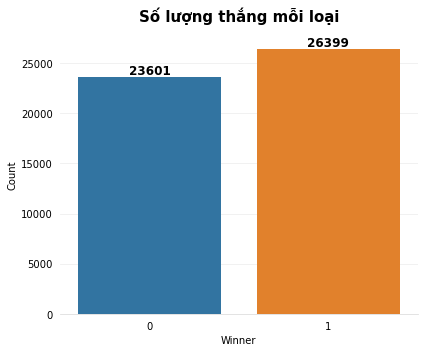

In [15]:
fig, ax = plt.subplots(figsize=(6, 5))
g = sns.barplot(data=combats.groupby('Winner').count().reset_index(), x='Winner', y='First_pokemon')
for p in g.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontweight='bold',
        fontsize=12
    )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_ylabel('Count')
ax.set_title('Số lượng thắng mỗi loại', fontweight='bold', fontsize=15, pad=15)
fig.tight_layout()
plt.show()

In [16]:
26399 - 23601

2798

In [17]:
origin_cols = pokemon.columns
new_cols = [cols + '_1' for cols in origin_cols]
new_cols += [cols + '_2' for cols in origin_cols]
new_cols += ['Winner']
print(new_cols)

['HP_1', 'Attack_1', 'Defense_1', 'Sp. Atk_1', 'Sp. Def_1', 'Speed_1', 'Generation_1', 'Legendary_1', 'Bug_1', 'Dark_1', 'Dragon_1', 'Electric_1', 'Fairy_1', 'Fighting_1', 'Fire_1', 'Flying_1', 'Ghost_1', 'Grass_1', 'Ground_1', 'Ice_1', 'Normal_1', 'Poison_1', 'Psychic_1', 'Rock_1', 'Steel_1', 'Water_1', 'HP_2', 'Attack_2', 'Defense_2', 'Sp. Atk_2', 'Sp. Def_2', 'Speed_2', 'Generation_2', 'Legendary_2', 'Bug_2', 'Dark_2', 'Dragon_2', 'Electric_2', 'Fairy_2', 'Fighting_2', 'Fire_2', 'Flying_2', 'Ghost_2', 'Grass_2', 'Ground_2', 'Ice_2', 'Normal_2', 'Poison_2', 'Psychic_2', 'Rock_2', 'Steel_2', 'Water_2', 'Winner']


In [18]:
def make_combat_data(row):
    first_pokemon = pokemon.loc[row['First_pokemon']].values
    second_pokemon = pokemon.loc[row['Second_pokemon']].values
    winner = np.array([-1])
    if 'Winner' in row:
        winner = row[['Winner']].values
    formated_row = np.concatenate((first_pokemon, second_pokemon, winner))
    return formated_row

In [19]:
%%time

preprocessed_data = combats.T.apply(make_combat_data).T
preprocessed_data.columns = new_cols
preprocessed_data

Wall time: 1min 31s


,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,Generation_1,Legendary_1,Bug_1,Dark_1,...,Grass_2,Ground_2,Ice_2,Normal_2,Poison_2,Psychic_2,Rock_2,Steel_2,Water_2,Winner
0,50,64,50,45,50,41,2,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,91,90,72,90,129,108,5,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,55,40,85,80,105,40,2,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,40,40,40,70,40,20,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,70,60,125,115,70,55,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,100,120,100,150,120,90,5,1,0,0,...,0,0,0,0,0,0,0,0,1,0
49996,60,85,40,30,45,68,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,60,50,100,85,70,65,3,0,0,0,...,0,0,0,1,0,0,0,0,0,1
49998,40,30,50,55,55,100,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 5. Xây dựng mô hình *phân loại nhị phân*

### 5.1 Lựa chọn các feature cần thiết (feature engineering)

Lựa chọn những cột mang giá trị tiềm năng để đưa cho mô hình học dữ liệu.

Khi không biết lựa như thế nào. Thì lựa tất cả.

In [20]:
features = preprocessed_data.columns[:-1]
target = 'Winner'

In [21]:
print(features)

Index(['HP_1', 'Attack_1', 'Defense_1', 'Sp. Atk_1', 'Sp. Def_1', 'Speed_1',
       'Generation_1', 'Legendary_1', 'Bug_1', 'Dark_1', 'Dragon_1',
       'Electric_1', 'Fairy_1', 'Fighting_1', 'Fire_1', 'Flying_1', 'Ghost_1',
       'Grass_1', 'Ground_1', 'Ice_1', 'Normal_1', 'Poison_1', 'Psychic_1',
       'Rock_1', 'Steel_1', 'Water_1', 'HP_2', 'Attack_2', 'Defense_2',
       'Sp. Atk_2', 'Sp. Def_2', 'Speed_2', 'Generation_2', 'Legendary_2',
       'Bug_2', 'Dark_2', 'Dragon_2', 'Electric_2', 'Fairy_2', 'Fighting_2',
       'Fire_2', 'Flying_2', 'Ghost_2', 'Grass_2', 'Ground_2', 'Ice_2',
       'Normal_2', 'Poison_2', 'Psychic_2', 'Rock_2', 'Steel_2', 'Water_2'],
      dtype='object')


In [22]:
print(target)

Winner


In [23]:
X = preprocessed_data[features]
y = preprocessed_data[target]

In [24]:
X.shape, y.shape

((50000, 52), (50000,))

In [25]:
X

,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,Generation_1,Legendary_1,Bug_1,Dark_1,...,Ghost_2,Grass_2,Ground_2,Ice_2,Normal_2,Poison_2,Psychic_2,Rock_2,Steel_2,Water_2
0,50,64,50,45,50,41,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,91,90,72,90,129,108,5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,55,40,85,80,105,40,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,40,40,40,70,40,20,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,70,60,125,115,70,55,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,100,120,100,150,120,90,5,1,0,0,...,0,0,0,0,0,0,0,0,0,1
49996,60,85,40,30,45,68,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,60,50,100,85,70,65,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
49998,40,30,50,55,55,100,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
y

0        1
1        1
2        1
3        1
4        0
        ..
49995    0
49996    0
49997    1
49998    0
49999    0
Name: Winner, Length: 50000, dtype: int64

### 5.2 Chia dữ liệu đã chọn lọc ra thành 2 phần: phần học và phần để đánh giá

In [27]:
random_state=12

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [29]:
Xtrain.shape, ytrain.shape

((40000, 52), (40000,))

In [30]:
Xtest.shape, ytest.shape

((10000, 52), (10000,))

In [31]:
Xtest

,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,Generation_1,Legendary_1,Bug_1,Dark_1,...,Ghost_2,Grass_2,Ground_2,Ice_2,Normal_2,Poison_2,Psychic_2,Rock_2,Steel_2,Water_2
34622,56,61,65,48,45,38,6,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1163,65,80,65,35,65,60,5,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7637,95,95,85,125,65,55,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7045,110,160,110,80,110,100,4,1,0,0,...,0,0,0,0,0,0,0,1,0,1
43847,67,125,40,30,30,58,4,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29299,60,62,50,62,60,40,4,0,0,0,...,0,0,1,0,0,0,0,0,0,1
29224,60,45,70,45,90,95,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16503,120,100,85,30,85,45,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40559,125,130,90,130,90,95,5,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### 5.3 Đưa dữ liệu cho thuật toán học

In [32]:
%%time

model = RandomForestClassifier(random_state=random_state)
model.fit(Xtrain, ytrain)

Wall time: 12.4 s


RandomForestClassifier(random_state=12)

### 5.4 Đánh giá mô hình học máy

#### Thông qua các hệ số

Hệ số đánh giá các mô hình phân loại (classification) đơn giản nhất là Mean Accuracy

$TruePredicted$ = Số lượng mẫu dự đoán đúng

$Total$ = Số lượng mẫu dự đoán

$Accuracy = \dfrac{TruePredicted}{Total}$

In [33]:
help(model.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.ensemble._forest.RandomForestClassifier instance
    Return the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs)
        True labels for `X`.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of ``self.predict(X)`` wrt. `y`.



Mean Accuracy với chính bộ train

In [34]:
model.score(Xtrain, ytrain)

1.0

Mean Accuracy với bộ test

In [35]:
model.score(Xtest, ytest)

0.9443

In [36]:
1 - 0.9443

0.05569999999999997

https://developers.google.com/machine-learning/crash-course/classification/accuracy

#### Thông qua trực quan hóa

In [37]:
pd.Series(model.feature_importances_, index=features).nlargest(10).reset_index()

,index,0
0,Speed_1,0.246330
1,Speed_2,0.236303
2,Attack_1,0.048084
3,Attack_2,0.045959
4,Sp. Atk_1,0.039460
5,Sp. Atk_2,0.035966
6,HP_1,0.032109
7,Sp. Def_1,0.031905
8,Sp. Def_2,0.031211
9,HP_2,0.031147


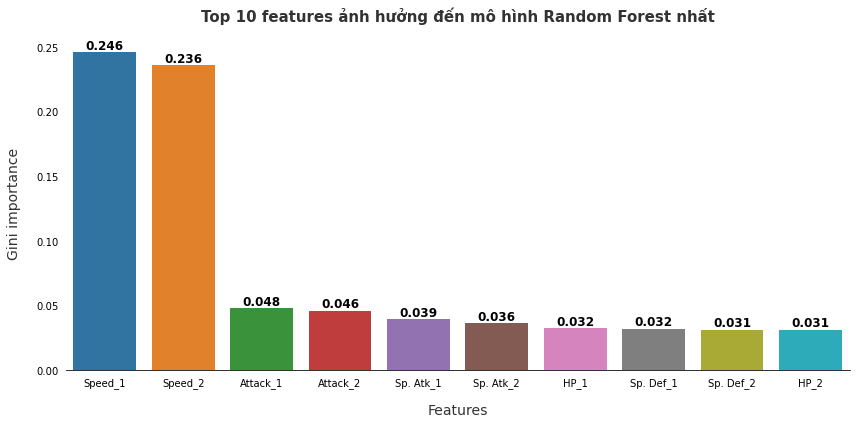

In [58]:
vis_data = pd.Series(model.feature_importances_, index=features).nlargest(10).reset_index()
vis_data.columns = ['Features', 'Gini importance']

fig, ax = plt.subplots(figsize=(12, 6))
g = sns.barplot(data=vis_data, x='Features', y='Gini importance')
for p in g.patches:
    ax.annotate(
        format(p.get_height(), '.3f'),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=12,
        fontweight='bold'
    )
for where in ['top', 'left', 'right']:
    ax.spines[where].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.set_axisbelow(True)
ax.set_title('Top 10 features ảnh hưởng đến mô hình Random Forest nhất',
             fontweight='bold', 
             fontsize=15,
             color='#333333',
             pad=15)
ax.set_xlabel('Features', fontsize=14, labelpad=15, color='#333333')
ax.set_ylabel('Gini importance', fontsize=14, labelpad=15, color='#333333')
fig.tight_layout()
plt.show()

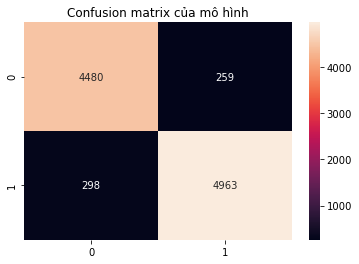

In [39]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(ytest, model.predict(Xtest)), annot=True, fmt='.0f')
ax.set_title('Confusion matrix của mô hình')
plt.show()

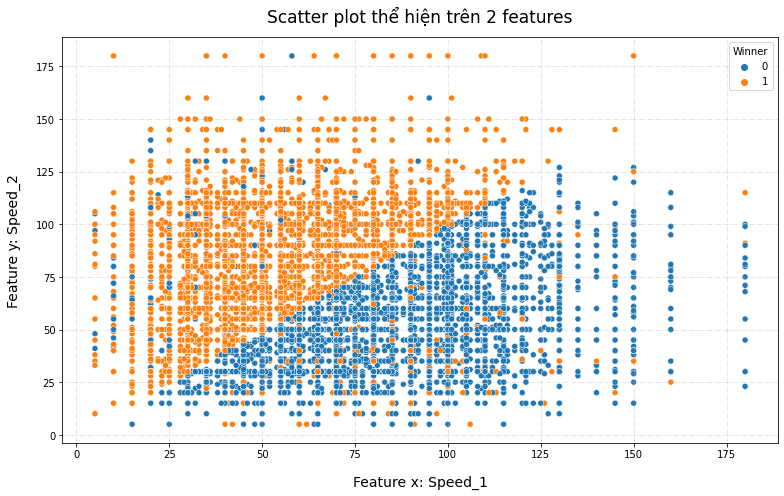

In [40]:
vis_data = pd.concat([Xtest[['Speed_1', 'Speed_2']], ytest], axis=1)
fig, ax = plt.subplots(figsize=(11, 7))
sns.scatterplot(data=vis_data, x='Speed_1', y='Speed_2', hue='Winner')
ax.grid(True, ls='-.', alpha=0.4)
ax.set_xlabel('Feature x: Speed_1', labelpad=15, fontsize=14)
ax.set_ylabel('Feature y: Speed_2', labelpad=15, fontsize=14)
ax.set_title('Scatter plot thể hiện trên 2 features', pad=15, fontsize=17)
fig.tight_layout()
plt.show()

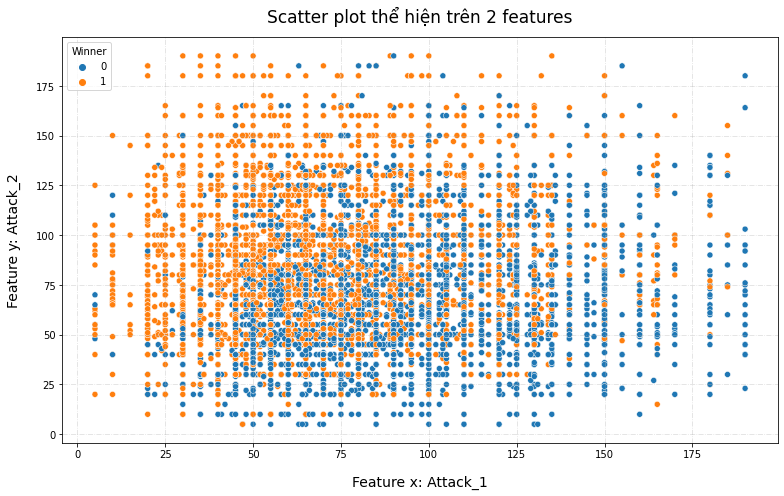

In [41]:
vis_data = pd.concat([Xtest[['Attack_1', 'Attack_2']], ytest], axis=1)
fig, ax = plt.subplots(figsize=(11, 7))
sns.scatterplot(data=vis_data, x='Attack_1', y='Attack_2', hue='Winner')
ax.grid(True, ls='-.', alpha=0.4)
ax.set_xlabel('Feature x: Attack_1', labelpad=15, fontsize=14)
ax.set_ylabel('Feature y: Attack_2', labelpad=15, fontsize=14)
ax.set_title('Scatter plot thể hiện trên 2 features', pad=15, fontsize=17)
fig.tight_layout()
plt.show()

## 6. Giải quyết bài toán đặt ra ở đầu bài

<img src="assets/combats/whowillwin.png" width="700" />

In [42]:
def make_combat_1vs1(index_of_pokemon):
    X_combat = pd.DataFrame(data=index_of_pokemon, index=['First_pokemon', 'Second_pokemon']).T.T.apply(make_combat_data).T
    X_combat.columns = new_cols
    return X_combat

Trường hợp *Tornadus Therian* là pokemon thứ 1 và *Greninja* là pokemon thứ 2

In [43]:
name_of_first_pokemon = 'Tornadus Therian Forme'
name_of_second_pokemon = 'Greninja'

In [44]:
index_of_pokemon = df[df['Name'].isin([name_of_first_pokemon, name_of_second_pokemon])].index
print(index_of_pokemon)
df.loc[index_of_pokemon]

Int64Index([704, 727], dtype='int64', name='#')


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,1
727,Greninja,Water,Dark,72,95,67,103,71,122,6,0


In [45]:
X_combat = make_combat_1vs1(index_of_pokemon)
X_combat

,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,Generation_1,Legendary_1,Bug_1,Dark_1,...,Grass_2,Ground_2,Ice_2,Normal_2,Poison_2,Psychic_2,Rock_2,Steel_2,Water_2,Winner
#,79,100,80,110,90,121,5,1,0,0,...,0,0,0,0,0,0,0,0,1,-1


In [46]:
X_combat[features]

,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,Generation_1,Legendary_1,Bug_1,Dark_1,...,Ghost_2,Grass_2,Ground_2,Ice_2,Normal_2,Poison_2,Psychic_2,Rock_2,Steel_2,Water_2
#,79,100,80,110,90,121,5,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
model.predict(X_combat[features])

array([1], dtype=int64)

Trường hợp *Greninja* là pokemon thứ 1 và *Tornadus Therian* là pokemon thứ 2

In [48]:
name_of_first_pokemon = 'Greninja'
name_of_second_pokemon = 'Tornadus Therian Forme'

In [49]:
index_of_pokemon = df[df['Name'].isin([name_of_first_pokemon, name_of_second_pokemon])].index
index_of_pokemon = index_of_pokemon[::-1]
df.loc[index_of_pokemon]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
727,Greninja,Water,Dark,72,95,67,103,71,122,6,0
704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,1


In [50]:
X_combat = make_combat_1vs1(index_of_pokemon)
X_combat

,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,Generation_1,Legendary_1,Bug_1,Dark_1,...,Grass_2,Ground_2,Ice_2,Normal_2,Poison_2,Psychic_2,Rock_2,Steel_2,Water_2,Winner
#,72,95,67,103,71,122,6,0,0,1,...,0,0,0,0,0,0,0,0,0,-1


In [51]:
model.predict(X_combat[features])

array([1], dtype=int64)

In [52]:
df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,1
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,1
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,1


In [53]:
index_pokemon = np.array([496, 231])
X_combat = make_combat_1vs1(index_pokemon)
X_combat

,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,Generation_1,Legendary_1,Bug_1,Dark_1,...,Grass_2,Ground_2,Ice_2,Normal_2,Poison_2,Psychic_2,Rock_2,Steel_2,Water_2,Winner
0,135,85,40,40,85,5,4,0,0,0,...,0,0,0,0,0,0,1,0,0,-1


In [54]:
model.predict(X_combat[features])

array([0], dtype=int64)

In [55]:
index_pokemon = index_pokemon[::-1]
X_combat = make_combat_1vs1(index_pokemon)
X_combat

,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,Generation_1,Legendary_1,Bug_1,Dark_1,...,Grass_2,Ground_2,Ice_2,Normal_2,Poison_2,Psychic_2,Rock_2,Steel_2,Water_2,Winner
0,20,10,230,10,230,5,2,0,1,0,...,0,0,0,1,0,0,0,0,0,-1


In [56]:
model.predict(X_combat[features])

array([1], dtype=int64)

In [57]:
df.sort_values(by='Speed')

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
496,Munchlax,Normal,NaN,135,85,40,40,85,5,4,0
231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,0
659,Ferroseed,Grass,Steel,44,50,91,24,86,10,5,0
487,Bonsly,Rock,NaN,50,80,95,10,45,10,4,0
360,Trapinch,Ground,NaN,45,100,45,45,45,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...
430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,1
72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,1,0
429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,3,1
